# Parameters EXPERT

Esta tabla contiene la información de los grupos de parámetros de funciones y Lambda expresiones EXPERT.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'parameters__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('parameters')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-15 11:18:03.575927 Data cache files found ...
2024-05-15 11:18:03.659833 Data cache files successfully loaded!!
The dataset contains 61740 (40.23%) instances for BEGINNER class and 91725 (59.77%) for EXPERT class.


In [1]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'parameters'
TABLE_FEATURES = ['parameters__parameters_role', 'parameters__number_of_params', 'parameters__pos_only_param_pct', 'parameters__var_param_pct', 'parameters__has_var_param', 'parameters__type_annotation_pct', 'parameters__kw_only_param_pct', 'parameters__default_value_pct', 'parameters__has_kw_param', 'parameters__name_convention']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-15 10:53:09.429548 Loading data ...
2024-05-15 10:53:11.480244 Data successfully load!!
2024-05-15 10:53:11.480244 Creating data cache files ...
2024-05-15 10:53:11.641003 Data cache files successfully created!!
Features shape: (153465, 11)
Target shape: (153465,)
As we can see the downloaded data contains a total of 153465 instances. Each of the instances corresponds to a program. For each program we have 11 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153465 entries, 0 to 153464
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   parameters__parameters_role      153465 non-null  object 
 1   parameters__number_of_params     153465 non-null  int64  
 2   parameters__pos_only_param_pct   153465 non-null  float64
 3   parameters__var_param_pct        153465 non-null  float64
 4   parameters__has_var_param        153465 non-null  bool   
 5   parameters__type_annotation_pct  153465 non-null  float64
 6   parameters__kw_only_param_pct    153465 non-null  float64
 7   parameters__default_value_pct    153465 non-null  float64
 8   parameters__has_kw_param         153465 non-null  bool   
 9   parameters__name_convention      139010 non-null  object 
 10  parameters__expertise_level      153465 non-null  object 
dtypes: bool(2), float64(5), int64(1), object(3)
memory usage: 10.8+ M

Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 2 variables boleanas y tres de tipo objeto. Una de las últimas variables es la etiqueta de la instancia. Sin embargo, en algunas ocasiones estas últimas clases no las vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [98.62%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [24]:
X.isnull().sum()

functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
functiondef__expertise_level               0
dtype: int64

In [5]:
print_empty_cols(X)

parameters__parameters_role
---------------------------
0 instancias no tienen un valor para la columna parameters__parameters_role


parameters__number_of_params
----------------------------
0 instancias no tienen un valor para la columna parameters__number_of_params


parameters__pos_only_param_pct
------------------------------
0 instancias no tienen un valor para la columna parameters__pos_only_param_pct


parameters__var_param_pct
-------------------------
0 instancias no tienen un valor para la columna parameters__var_param_pct


parameters__has_var_param
-------------------------
0 instancias no tienen un valor para la columna parameters__has_var_param


parameters__type_annotation_pct
-------------------------------
0 instancias no tienen un valor para la columna parameters__type_annotation_pct


parameters__kw_only_param_pct
-----------------------------
0 instancias no tienen un valor para la columna parameters__kw_only_param_pct


parameters__default_value_pct
--------------

### 2.4 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
parameters__parameters_role,153465,2,FunctionParams,147627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__number_of_params,153465.0,NaN,NaN,NaN,1.988525,1.953972,0.0,1.0,2.0,2.0,58.0
parameters__pos_only_param_pct,153465.0,NaN,NaN,NaN,0.000029,0.00419,0.0,0.0,0.0,0.0,0.666667
parameters__var_param_pct,153465.0,NaN,NaN,NaN,0.009543,0.072942,0.0,0.0,0.0,0.0,1.0
parameters__has_var_param,153465,2,False,150202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__type_annotation_pct,153465.0,NaN,NaN,NaN,0.16463,0.323918,0.0,0.0,0.0,0.0,1.0
parameters__kw_only_param_pct,153465.0,NaN,NaN,NaN,0.005296,0.060159,0.0,0.0,0.0,0.0,1.0
parameters__default_value_pct,153465.0,NaN,NaN,NaN,0.083933,0.209585,0.0,0.0,0.0,0.0,1.0
parameters__has_kw_param,153465,2,False,144158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameters__name_convention,139010,7,Lower,108233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "parameters__number_of_params": [(0.0, 1.0), (1.0, 2.0), (2.0, 2.0), (2.0, inf)], # min: 0 ; max: 58
    "parameters__pos_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__var_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "parameters__type_annotation_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__kw_only_param_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
    "parameters__default_value_pct": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 0.67
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['parameters__number_of_params'], 10))
print(get_statistics(X_copy, ['parameters__pos_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__var_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__type_annotation_pct'], 10))
print(get_statistics(X_copy, ['parameters__kw_only_param_pct'], 10))
print(get_statistics(X_copy, ['parameters__default_value_pct'], 10))
print(get_statistics(full_table, ['parameters__name_convention'], 10))
print(get_statistics(full_table, ['parameters__parameters_role'], 10))
print(get_statistics(X_copy, ['parameters__has_var_param'], 10))
print(get_statistics(X_copy, ['parameters__has_kw_param'], 10))
# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
parameters__number_of_params  count  percentage
                   [1.0_2.0)  60542   39.450037
                   [2.0_2.0]  41453   27.011371
                   [2.0_inf]  37015   24.119506
                   [0.0_1.0)  14455    9.419086

parameters__pos_only_param_pct  count  percentage
                     [0.0_0.0] 153457   99.994787
                     [0.0_inf]      8    0.005213

parameters__var_param_pct  count  percentage
                [0.0_0.0] 150202   97.873782
                [0.0_inf]   3263    2.126218

parameters__type_annotation_pct  count  percentage
                      [0.0_0.0] 119086   77.598149
                      [0.0_inf]  34379   22.401851

parameters__kw_only_param_pct  count  percentage
                    [0.0_0.0] 152096    99.10794
                    [0.0_inf]   1369     0.89206

parameters__default_value_pct  count  percentage
                    [0.0_0.0] 128663    83.83866
                    [0.0_inf]  24802    16.16134


In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (153465, 19)
Target shape: (153465,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

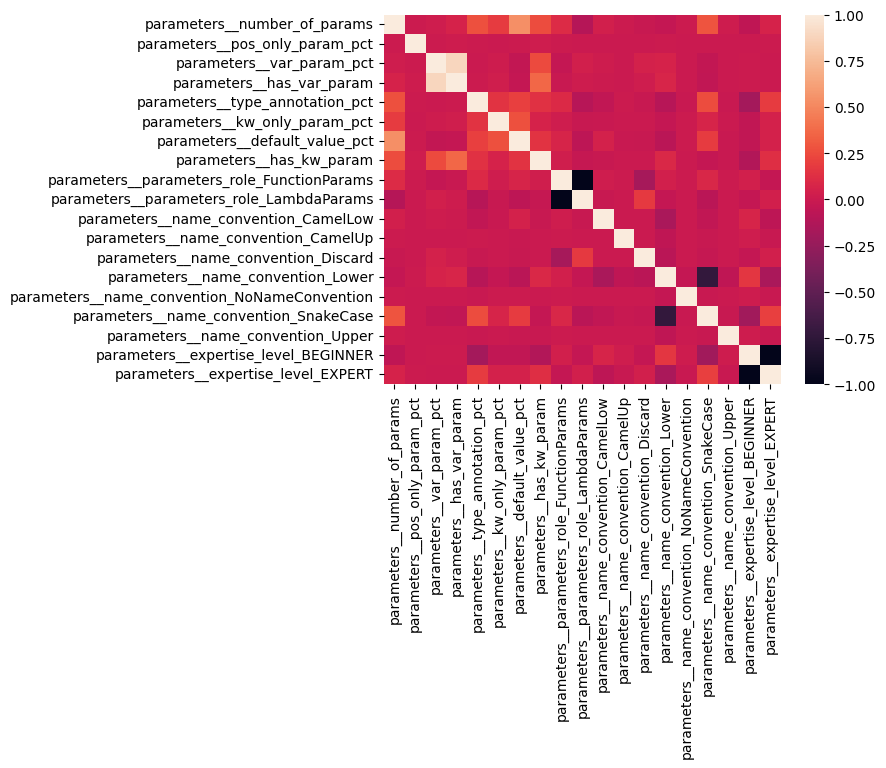

In [9]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 10 variable (3 booleanas, 4 porcentuales y 3 numericas) se hara un analisis detallado 

### Variable has_var_param (1/10)
Esta variable es de tipo booleano y representa existe al menos un parámetro del tipo vararg.

<Axes: xlabel='parameters__has_var_param', ylabel='Count'>

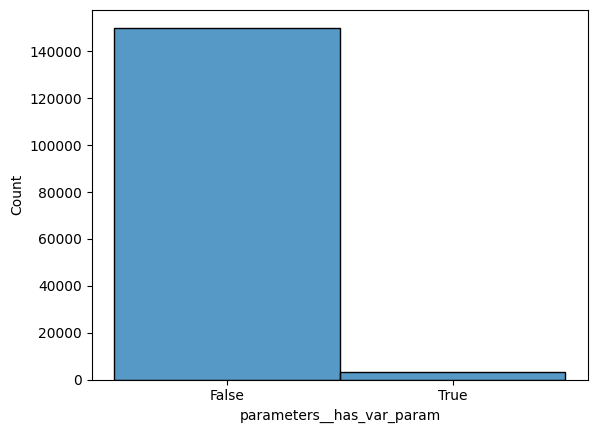

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_var_param'], discrete=True)

In [11]:
num_true_values = len(X[X['parameters__has_var_param'] == True])
num_false_values = len(X[X['parameters__has_var_param'] == False])
std = X['parameters__has_var_param'].std()
freq_true = len(X[X['parameters__has_var_param'] == True]) / len(X['parameters__has_var_param'])
freq_false = len(X[X['parameters__has_var_param'] == False]) / len(X['parameters__has_var_param'])
print(f'La variable has_var_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_var_param a False es {freq_false}.')

La variable has_var_param contiene 3263 valores verdaderos y 150202 valores falsos. Y, la desviación típica es de 0.1442575305700302
La frecuencia con la que programa puede tener la variable has_var_param a True es 0.021262177043625582.
La frecuencia con la que programa puede tener la variable has_var_param a False es 0.9787378229563745.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_var_param', possible_values)

La variable parameters__has_var_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_var_param toma el valor de 0.0 en un 97.87% de los items.
La variable parameters__has_var_param toma el valor de 1.0 en un 2.126% de los items.


In [13]:
X[X['parameters__has_var_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,3263.000000,3263.000000,3263.000000,3263.0,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.0,3263.00000,3263.000000,3263.0,3263.000000,3263.0,3263.000000,3263.000000
mean,2.753907,0.000358,0.448841,1.0,0.170205,0.018018,0.030272,0.649096,0.945143,0.054857,0.011646,0.0,0.01042,0.927674,0.0,0.050260,0.0,0.413423,0.586577
std,1.329220,0.012027,0.230377,0.0,0.326116,0.088630,0.110138,0.477326,0.227737,0.227737,0.107302,0.0,0.10156,0.259067,0.0,0.218515,0.0,0.492523,0.492523
min,1.000000,0.000000,0.058824,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,2.000000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,3.000000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.0,0.000000,0.0,0.000000,1.000000
75%,3.000000,0.000000,0.500000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.0,0.000000,0.0,1.000000,1.000000
max,17.000000,0.500000,1.000000,1.0,1.000000,0.823529,0.823529,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


### Variable has_kw_param (2/10)
Esta variable es de tipo booleano y representa si existe al menos un parámetro del tipo kwarg.

<Axes: xlabel='parameters__has_kw_param', ylabel='Count'>

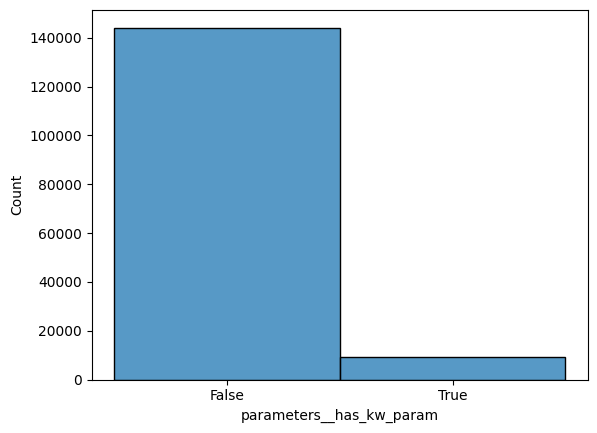

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['parameters__has_kw_param'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['parameters__has_kw_param'] == True])
num_false_values = len(X[X['parameters__has_kw_param'] == False])
std = X['parameters__has_kw_param'].std()
freq_true = len(X[X['parameters__has_kw_param'] == True]) / len(X['parameters__has_kw_param'])
freq_false = len(X[X['parameters__has_kw_param'] == False]) / len(X['parameters__has_kw_param'])
print(f'La variable has_kw_param contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_kw_param a False es {freq_false}.')

La variable has_kw_param contiene 9307 valores verdaderos y 144158 valores falsos. Y, la desviación típica es de 0.2386801391839981
La frecuencia con la que programa puede tener la variable has_kw_param a True es 0.060645749845241584.
La frecuencia con la que programa puede tener la variable has_kw_param a False es 0.9393542501547584.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'parameters__has_kw_param', possible_values)

La variable parameters__has_kw_param contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__has_kw_param toma el valor de 0.0 en un 93.94% de los items.
La variable parameters__has_kw_param toma el valor de 1.0 en un 6.065% de los items.


In [17]:
#VALORES DE LOS DATOS CONDICIONADOS A TRUE/FALSE
X[X['parameters__has_kw_param'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.0,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.000000,9307.0,9307.000000,9307.000000,9307.000000,9307.000000
mean,3.957022,0.000412,0.079380,0.227571,0.339957,0.019230,0.201048,1.0,0.983131,0.016869,0.002686,0.000645,0.002579,0.861610,0.0,0.132373,0.000107,0.173096,0.826904
std,3.252317,0.015544,0.154028,0.419286,0.364268,0.106235,0.259864,0.0,0.128788,0.128788,0.051761,0.025384,0.050718,0.345328,0.0,0.338915,0.010366,0.378350,0.378350
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,4.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.500000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,53.000000,0.666667,0.500000,1.000000,1.000000,0.944444,0.950000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


El 82% de los parameters con has_kw_param a True es de programas de EXPERTOS.

### Variable number_of_params (3/10)
Esta variable representa el número de parámetros que hay en el conjuto de la entidad parameters. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 58. Con una media de 1.988.

<Axes: ylabel='parameters__number_of_params'>

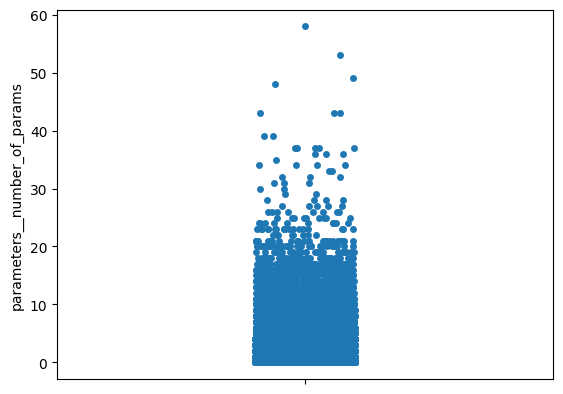

In [18]:
sns.stripplot(X['parameters__number_of_params'])

In [19]:
print_outliers_for_df_column(X, 'parameters__number_of_params')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.46561616350864543
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.7060046900060111,11.65938288016386]
-3.0IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -2.0 (Q1-3*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__number_of_params inferior a -0.5 (Q1-1.5*IQR) para parameters__number_of_params. Representando un 0.0% del total de instancias.
+1.5IQR: 18299 instancias tienen un valor para parameters__number_of_params superior a 3.5 (Q3+1.5*IQR) para parameters__number_of_params. Representando un 11.92% del total de instancias.
+3.0IQR: 5827 instancias tienen un valor para parameters__number_of_params superior a 5.0 (Q3-3*IQR) para parameters__number_of_params. Representando un 3.797% del total de instanci

In [20]:
X[X['parameters__number_of_params'] > 11].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.0,1017.0,1017.000000,1017.0,1017.0,1017.000000,1017.0,1017.000000,1017.000000,1017.000000,1017.000000
mean,15.993117,0.0,0.000738,0.009833,0.476997,0.089807,0.723687,0.308751,1.0,0.0,0.006883,0.0,0.0,0.179941,0.0,0.810226,0.002950,0.169125,0.830875
std,5.254259,0.0,0.007479,0.098721,0.448448,0.256600,0.270482,0.462206,0.0,0.0,0.082718,0.0,0.0,0.384327,0.0,0.392315,0.054259,0.375047,0.375047
min,12.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
50%,14.000000,0.0,0.000000,0.000000,0.388889,0.000000,0.818182,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
75%,17.000000,0.0,0.000000,0.000000,0.928571,0.000000,0.900000,1.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.000000
max,58.000000,0.0,0.083333,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


El 83% de es de expertos.

### Variable pos_only_param_pct (4/10)
Esta variable representa la proporción de los parámetros pos_only. Toma los valores de 0.0 - 0.667. La media es 0.000029.

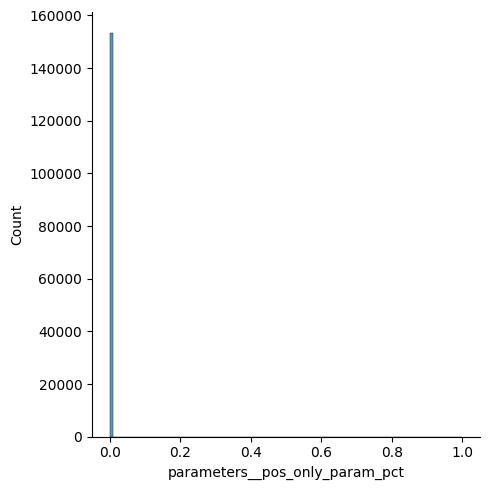

In [21]:
sns.displot(X['parameters__pos_only_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [22]:
print_outliers_for_df_column(X, 'parameters__pos_only_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9964789392537298
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__pos_only_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__pos_only_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 8 instancias tienen un valor para parameters__pos_only_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__pos_only_param_pct. Representando un 0.005213% del total de instancias.
+3.0IQR: 8 instancias tienen un valor para parameters__pos_only_param_pct superior a 0.0 (Q3-3*IQR) para parameters__pos_only_param_pct. Representando un 0.005213% del total de instancias.
L: 0 instancias

In [23]:
X[X['parameters__pos_only_param_pct'] == 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,153457.000000,153457.0,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000,153457.000000
mean,1.988466,0.0,0.009538,0.021244,0.164619,0.005296,0.083930,0.060603,0.961957,0.038043,0.010909,0.001505,0.002581,0.705253,0.000580,0.183602,0.001375,0.402328,0.597672
std,1.954005,0.0,0.072932,0.144196,0.323911,0.060160,0.209587,0.238602,0.191301,0.191301,0.103873,0.038769,0.050733,0.455930,0.024076,0.387160,0.037055,0.490369,0.490369
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,58.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable type_annotation_pct (5/10)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo. Este campo toma valores del 0.0 - 1.0. Su media es 0.1646.

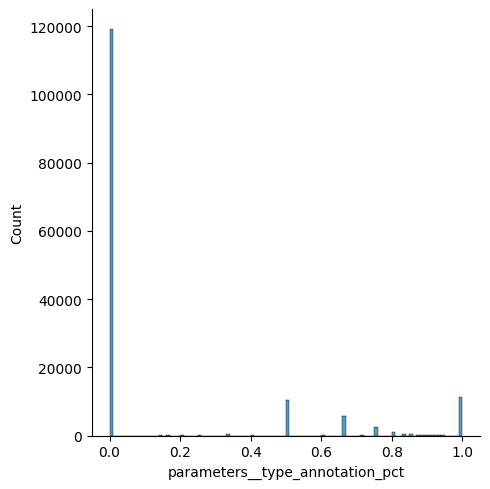

In [25]:
sns.displot(X['parameters__type_annotation_pct'], bins=[i / 100 for i in range(0, 101)])

In [26]:
print_outliers_for_df_column(X, 'parameters__type_annotation_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6635613294897806
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a 0.0 (Q1-3*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__type_annotation_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__type_annotation_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 34379 instancias tienen un valor para parameters__type_annotation_pct superior a 0.0 (Q3+1.5*IQR) para parameters__type_annotation_pct. Representando un 22.4% del total de instancias.
+3.0IQR: 34379 instancias tienen un valor para parameters__type_annotation_pct superior a 0.0 (Q3-3*IQR) para parameters__type_annotation_pct. Representando un 22.4% del total de instancias.
L: 0 in

In [28]:
X[X['parameters__type_annotation_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.0,34379.0,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000,34379.000000
mean,3.017074,0.000078,0.008275,0.022165,0.734897,0.019854,0.156750,0.136711,1.0,0.0,0.000116,0.001862,0.000611,0.638646,0.000058,0.358271,0.000436,0.209779,0.790221
std,2.556767,0.007191,0.061189,0.147221,0.221990,0.116012,0.272079,0.343547,0.0,0.0,0.010786,0.043107,0.024708,0.480400,0.007627,0.479499,0.020884,0.407157,0.407157
min,1.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.333333,0.000000,1.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,58.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


80% expertos y 20% beginners.

### Variable var_param_pct (6/10)
Esta variable representa la proporción de los parámetros que son del tipo vararg. Este campo toma valores del 0.0 - 1.0. Su media es 0.009543.

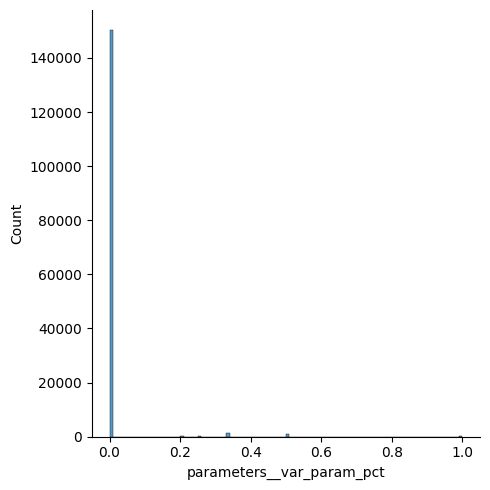

In [29]:
sns.displot(X['parameters__var_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [30]:
print_outliers_for_df_column(X, 'parameters__var_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9298109392403973
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__var_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__var_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 3263 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__var_param_pct. Representando un 2.126% del total de instancias.
+3.0IQR: 3263 instancias tienen un valor para parameters__var_param_pct superior a 0.0 (Q3-3*IQR) para parameters__var_param_pct. Representando un 2.126% del total de instancias.
L: 0 instancias tienen un valor para parameters__var_pa

In [31]:
X[X['parameters__var_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,3263.000000,3263.000000,3263.000000,3263.0,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.0,3263.00000,3263.000000,3263.0,3263.000000,3263.0,3263.000000,3263.000000
mean,2.753907,0.000358,0.448841,1.0,0.170205,0.018018,0.030272,0.649096,0.945143,0.054857,0.011646,0.0,0.01042,0.927674,0.0,0.050260,0.0,0.413423,0.586577
std,1.329220,0.012027,0.230377,0.0,0.326116,0.088630,0.110138,0.477326,0.227737,0.227737,0.107302,0.0,0.10156,0.259067,0.0,0.218515,0.0,0.492523,0.492523
min,1.000000,0.000000,0.058824,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,2.000000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,3.000000,0.000000,0.333333,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.0,0.000000,0.0,0.000000,1.000000
75%,3.000000,0.000000,0.500000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.0,0.000000,0.0,1.000000,1.000000
max,17.000000,0.500000,1.000000,1.0,1.000000,0.823529,0.823529,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,0.0,1.000000,0.0,1.000000,1.000000


### Variable kw_only_param_pct (7/10)
Esta variable representa la proporción de los parámetros del tipo kw_only. Este campo toma valores del 0.0 - 1.0. Su media es 0.005296.

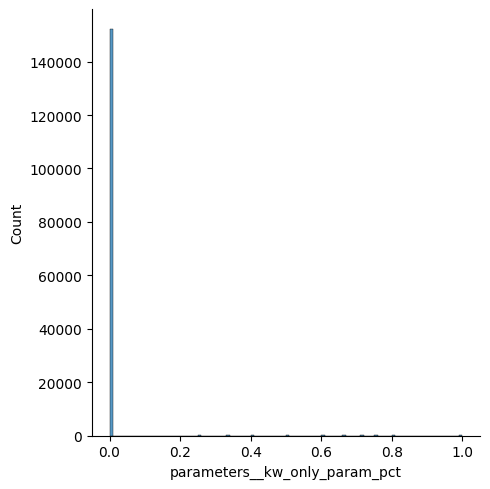

In [32]:
sns.displot(X['parameters__kw_only_param_pct'], bins=[i / 100 for i in range(0, 101)])

In [33]:
print_outliers_for_df_column(X, 'parameters__kw_only_param_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9533360446807297
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-3*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__kw_only_param_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__kw_only_param_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1369 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3+1.5*IQR) para parameters__kw_only_param_pct. Representando un 0.8921% del total de instancias.
+3.0IQR: 1369 instancias tienen un valor para parameters__kw_only_param_pct superior a 0.0 (Q3-3*IQR) para parameters__kw_only_param_pct. Representando un 0.8921% del total de instancias.
L: 0 instancias tiene

In [34]:
X[X['parameters__kw_only_param_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,1369.000000,1369.0,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.0,1369.0,1369.0,1369.000000,1369.000000,1369.000000,1369.0,1369.000000,1369.000000
mean,5.659606,0.0,0.025983,0.108108,0.668850,0.593670,0.649484,0.249087,0.999270,0.000730,0.0,0.0,0.0,0.602630,0.001461,0.395909,0.0,0.131483,0.868517
std,3.934346,0.0,0.081757,0.310630,0.342625,0.237564,0.227636,0.432642,0.027027,0.027027,0.0,0.0,0.0,0.489533,0.038208,0.489224,0.0,0.338051,0.338051
min,1.000000,0.0,0.000000,0.000000,0.000000,0.076923,0.142857,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,3.000000,0.0,0.000000,0.000000,0.500000,0.400000,0.500000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,4.000000,0.0,0.000000,0.000000,0.800000,0.600000,0.666667,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,7.000000,0.0,0.000000,0.000000,0.928571,0.800000,0.833333,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,39.000000,0.0,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


86% expertos y 14% beginners

### Variable default_value_pct (8/10)
Esta variable representa la proporción de los parámetros que tienen valor por defecto. Este campo toma valores del 0.0 - 1.0. Su media es 0.0839.

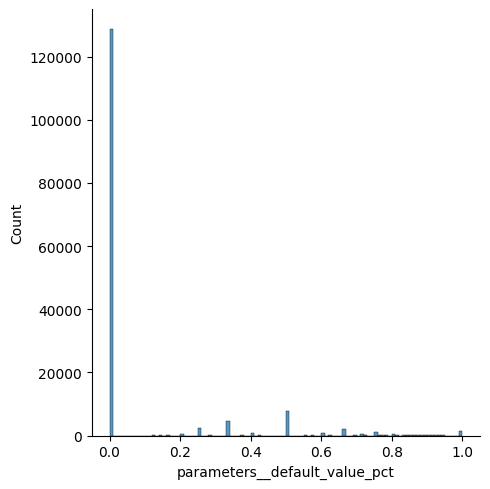

In [35]:
sns.displot(X['parameters__default_value_pct'], bins=[i / 100 for i in range(0, 101)])

In [36]:
print_outliers_for_df_column(X, 'parameters__default_value_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7577979110764574
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-3*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para parameters__default_value_pct inferior a 0.0 (Q1-1.5*IQR) para parameters__default_value_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 24802 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3+1.5*IQR) para parameters__default_value_pct. Representando un 16.16% del total de instancias.
+3.0IQR: 24802 instancias tienen un valor para parameters__default_value_pct superior a 0.0 (Q3-3*IQR) para parameters__default_value_pct. Representando un 16.16% del total de instancias.
L: 0 instancias tiene

In [37]:
X[X['parameters__default_value_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,parameters__number_of_params,parameters__pos_only_param_pct,parameters__var_param_pct,parameters__has_var_param,parameters__type_annotation_pct,parameters__kw_only_param_pct,parameters__default_value_pct,parameters__has_kw_param,parameters__parameters_role_FunctionParams,parameters__parameters_role_LambdaParams,parameters__name_convention_CamelLow,parameters__name_convention_CamelUp,parameters__name_convention_Discard,parameters__name_convention_Lower,parameters__name_convention_NoNameConvention,parameters__name_convention_SnakeCase,parameters__name_convention_Upper,parameters__expertise_level_BEGINNER,parameters__expertise_level_EXPERT
count,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000,24802.000000
mean,4.287396,0.000081,0.002537,0.011047,0.306806,0.032769,0.519342,0.160390,0.996008,0.003992,0.024353,0.000323,0.000081,0.645029,0.000766,0.328925,0.000524,0.342674,0.657326
std,3.222283,0.007332,0.025653,0.104527,0.392409,0.146608,0.213702,0.366975,0.063054,0.063054,0.154145,0.017957,0.008980,0.478514,0.027668,0.469832,0.022889,0.474613,0.474613
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,58.000000,0.666667,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable parameters_role (9/10)
Esta variable es de tipo categorica y representa si la entidad parameters proviene de una función de una Lambda expresión.

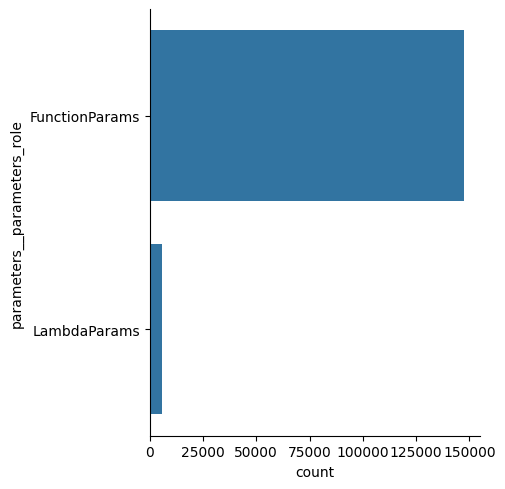

In [38]:
sns.catplot(full_table['parameters__parameters_role'], kind="count")

In [39]:
print_frequency_anal_for_cat_var(full_table, 'parameters__parameters_role')

La variable parameters__parameters_role contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable parameters__parameters_role toma el valor de FunctionParams en un 96.2% de los items.
La variable parameters__parameters_role toma el valor de LambdaParams en un 3.804% de los items.


### Variable name_convention (10/10)
Esta variable es de tipo categorica y representa el name convention del nombre del parámetro.

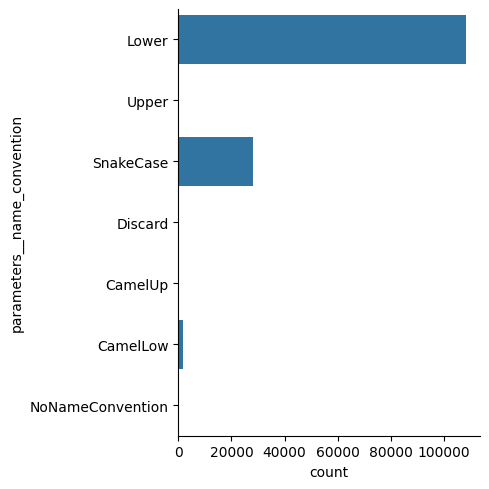

In [40]:
sns.catplot(full_table['parameters__name_convention'], kind="count")

In [41]:
print_frequency_anal_for_cat_var(full_table, 'parameters__name_convention')

La variable parameters__name_convention contiene 8 valores distintos.
El umbral de outlier es de 0.025%
La variable parameters__name_convention toma el valor de Lower en un 70.53% de los items.
La variable parameters__name_convention toma el valor de SnakeCase en un 18.36% de los items.
La variable parameters__name_convention toma el valor de CamelLow en un 1.091% de los items.
La variable parameters__name_convention toma el valor de Discard en un 0.258% de los items.
La variable parameters__name_convention toma el valor de CamelUp en un 0.1505% de los items.
La variable parameters__name_convention toma el valor de Upper en un 0.1375% de los items.
La variable parameters__name_convention toma el valor de NoNameConvention en un 0.05799% de los items.
La variable parameters__name_convention toma el valor de None en un 0.0% de los items. [OUTLIER]
